In [1]:
# 분석전에 필요한 라이브러리들을 불러오기

# plotly라이브러리가 없다면 아래 설치
# conda install -c plotly plotly=4.12.0
# conda install -c conda-forge cufflinks-py
# conda install seaborn


import glob 
import os
import sys, subprocess
from subprocess import Popen, PIPE
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(font="D2Coding") 
# sns.set(font="Malgun Gothic") 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go 
import chart_studio.plotly as py
import cufflinks as cf
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()



from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


C:\Users\archi\AppData\Local\Temp\ipykernel_33320\2615906385.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [2]:
df_raw = pd.read_excel('metro_sim.xlsx')
df_raw.head()

,ACH50,Lighting_power_density_,Chiller_COP,Pump_efficiency,Fan_total_efficiency,heat_recover_effectiveness,AHU_economiser,Occupied_floor_area,Floor,Basement,Ground,Room_Electricity,Lighting,Fans,Pumps,Heating,Cooling,DHW,Electricity_total
0,25,7.5,5.5,0.9,0.7,0.75,0,10154.0,3,1,0,1110023.0,526557.8,267694.2,2035.819,34369.69,347832.7,1017.580,2289530.789
1,20,7.5,5.5,0.9,0.7,0.75,0,10154.0,3,1,0,1110023.0,526557.8,255068.6,1970.193,26113.53,346823.2,1017.564,2267573.887
2,15,7.5,5.5,0.9,0.7,0.75,0,10154.0,3,1,0,1110023.0,526557.8,243421.1,1909.198,18019.33,346789.9,1017.546,2247737.874
3,25,6.5,5.5,0.9,0.7,0.75,0,10154.0,3,1,0,1110023.0,456350.1,267698.7,2010.396,36664.86,343562.3,1017.586,2217326.942
4,25,5.5,5.5,0.9,0.7,0.75,0,10154.0,3,1,0,1110023.0,386142.4,267703.3,1984.986,39080.25,339321.1,1017.594,2145272.630


In [3]:
df_raw.columns

Index(['ACH50', 'Lighting_power_density_', 'Chiller_COP', 'Pump_efficiency',
       'Fan_total_efficiency', 'heat_recover_effectiveness', 'AHU_economiser',
       'Occupied_floor_area', 'Floor', 'Basement', 'Ground',
       'Room_Electricity', 'Lighting', 'Fans', 'Pumps', 'Heating', 'Cooling',
       'DHW', 'Electricity_total'],
      dtype='object')

In [4]:
lm_features =['ACH50', 'Lighting_power_density_', 'Chiller_COP', 'Pump_efficiency',
       'Fan_total_efficiency', 'heat_recover_effectiveness', 'AHU_economiser',
       'Occupied_floor_area', 'Floor', 'Basement', 'Ground',]

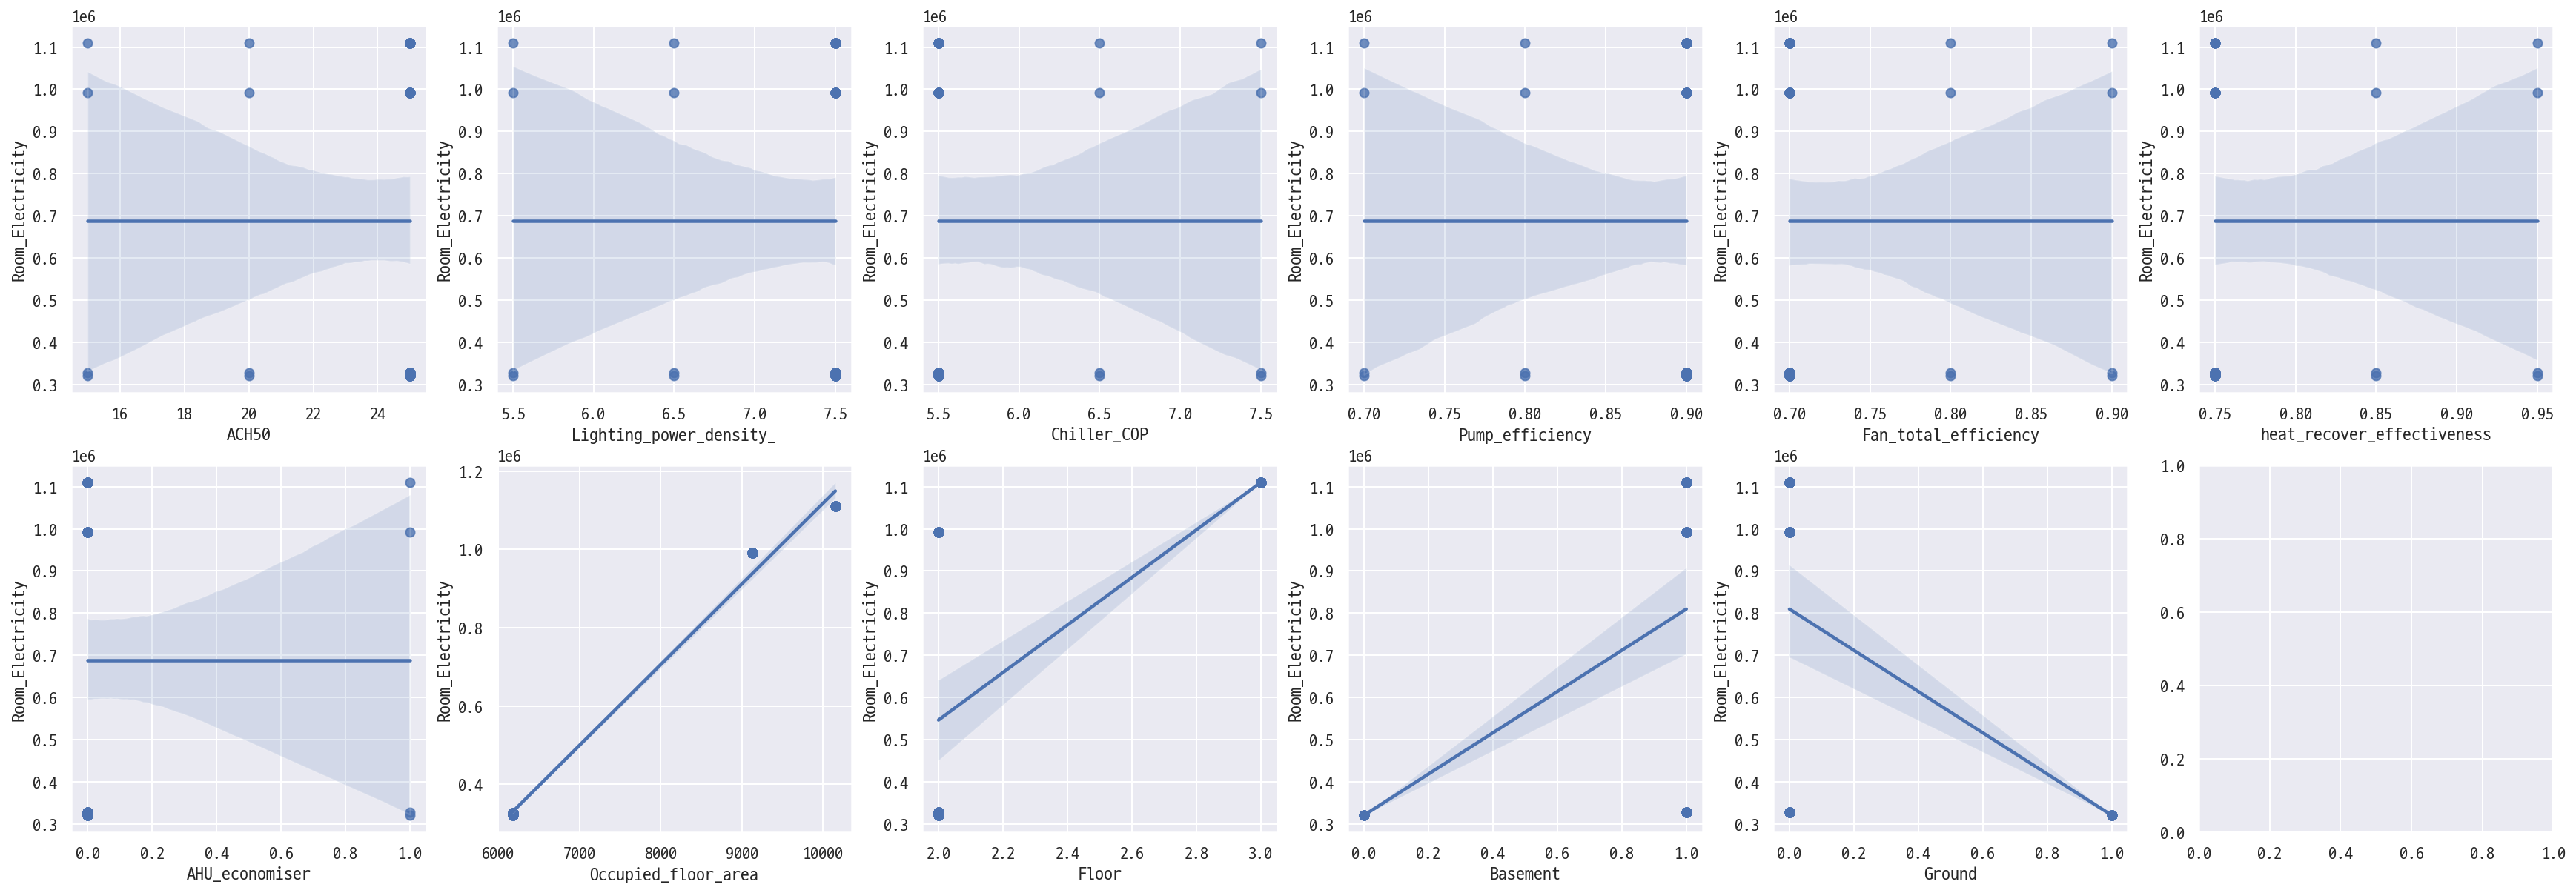

In [5]:
fig, axs = plt.subplots(figsize=(30, 10), ncols=6, nrows=2)

for i, feature in enumerate(lm_features):
    row = int(i/6)
    col = i%6
    #seaborn 의 regplot 을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='Room_Electricity', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Lighting', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Fans', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Pumps', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Heating', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Cooling', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='DHW', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Electricity_total', data=df_raw, ax=axs[row][col])

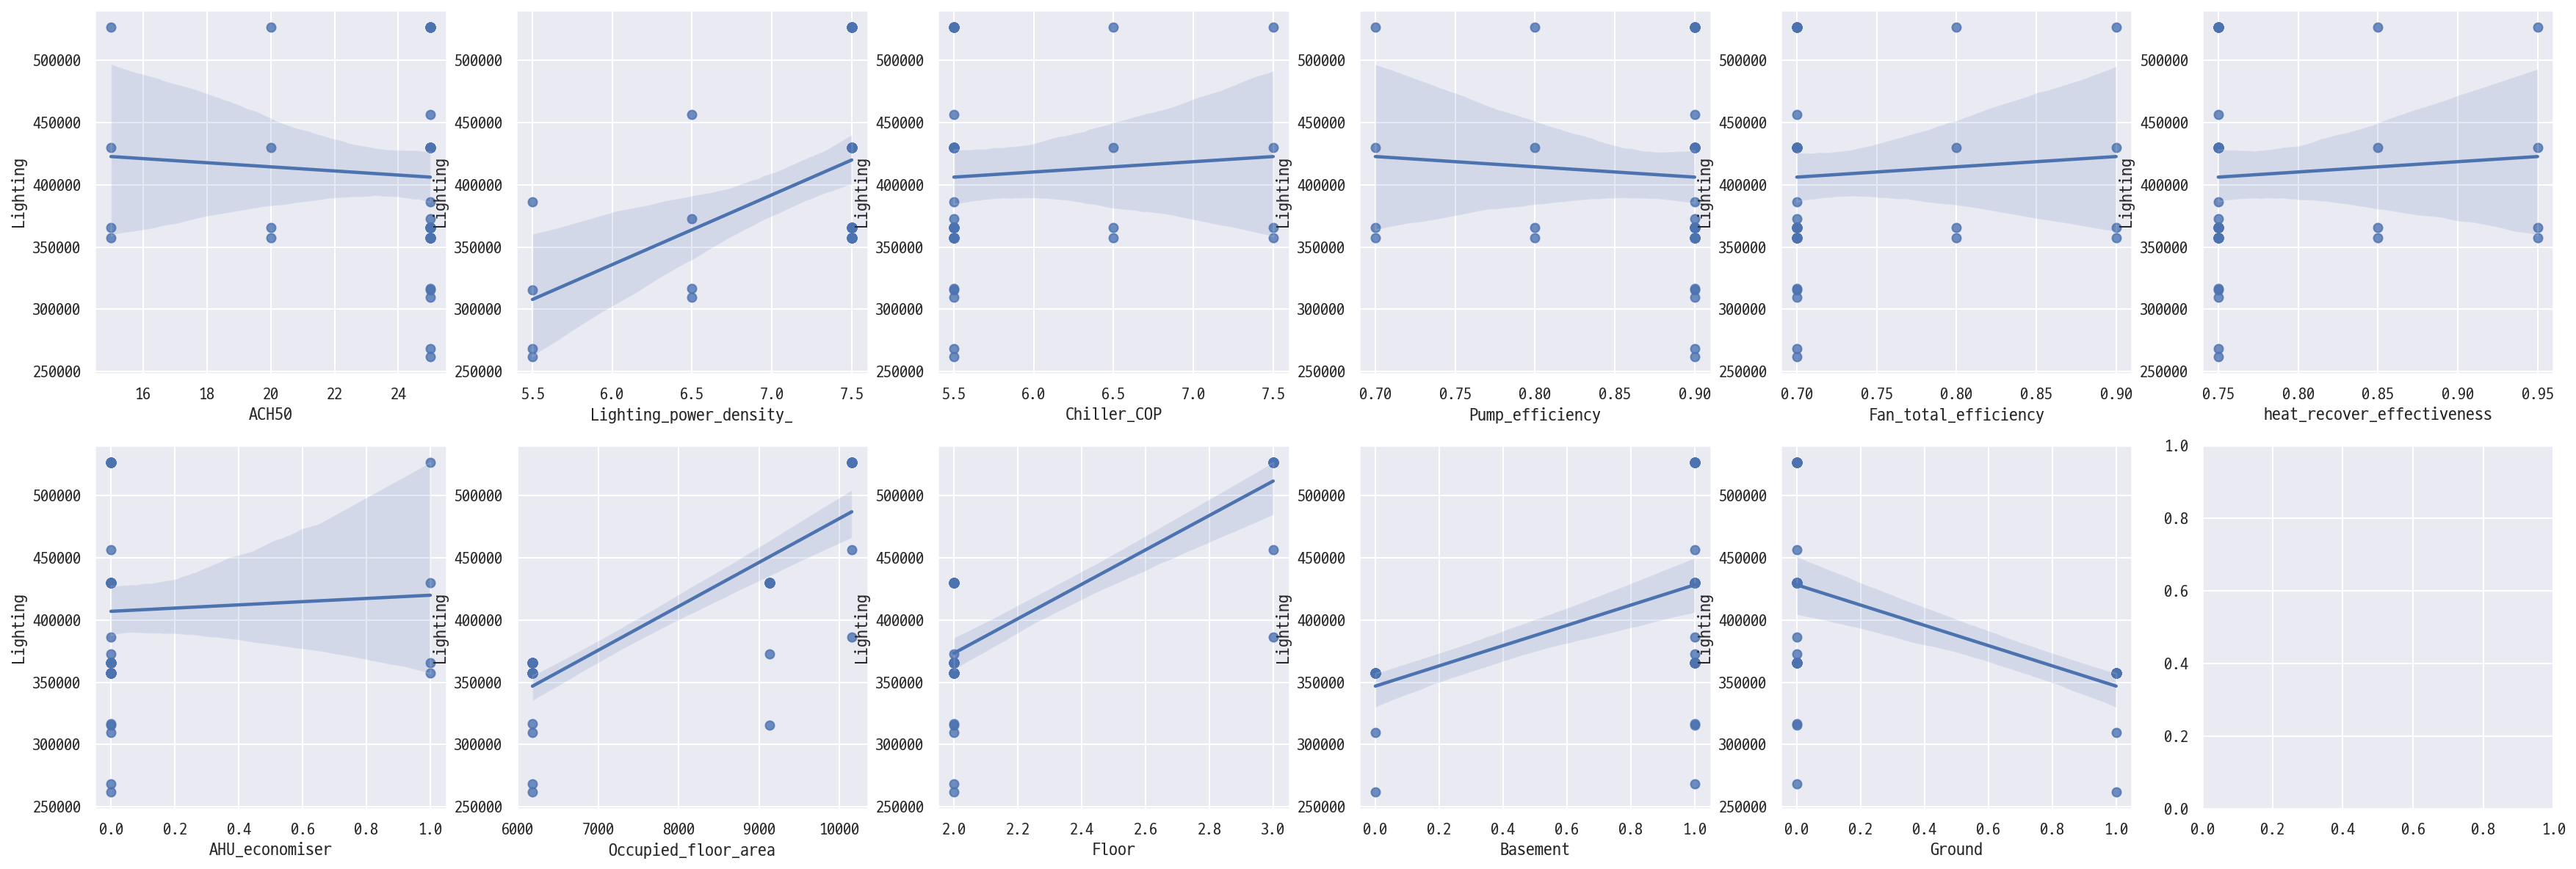

In [6]:
fig, axs = plt.subplots(figsize=(30, 10), ncols=6, nrows=2)
for i, feature in enumerate(lm_features):
    row = int(i/6) #
    col = i%6 
    #seaborn 의 regplot 을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # sns.regplot(x=feature, y='Room_Electricity', data=df_raw, ax=axs[row][col])
    sns.regplot(x=feature, y='Lighting', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Fans', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Pumps', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Heating', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Cooling', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='DHW', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Electricity_total', data=df_raw, ax=axs[row][col])

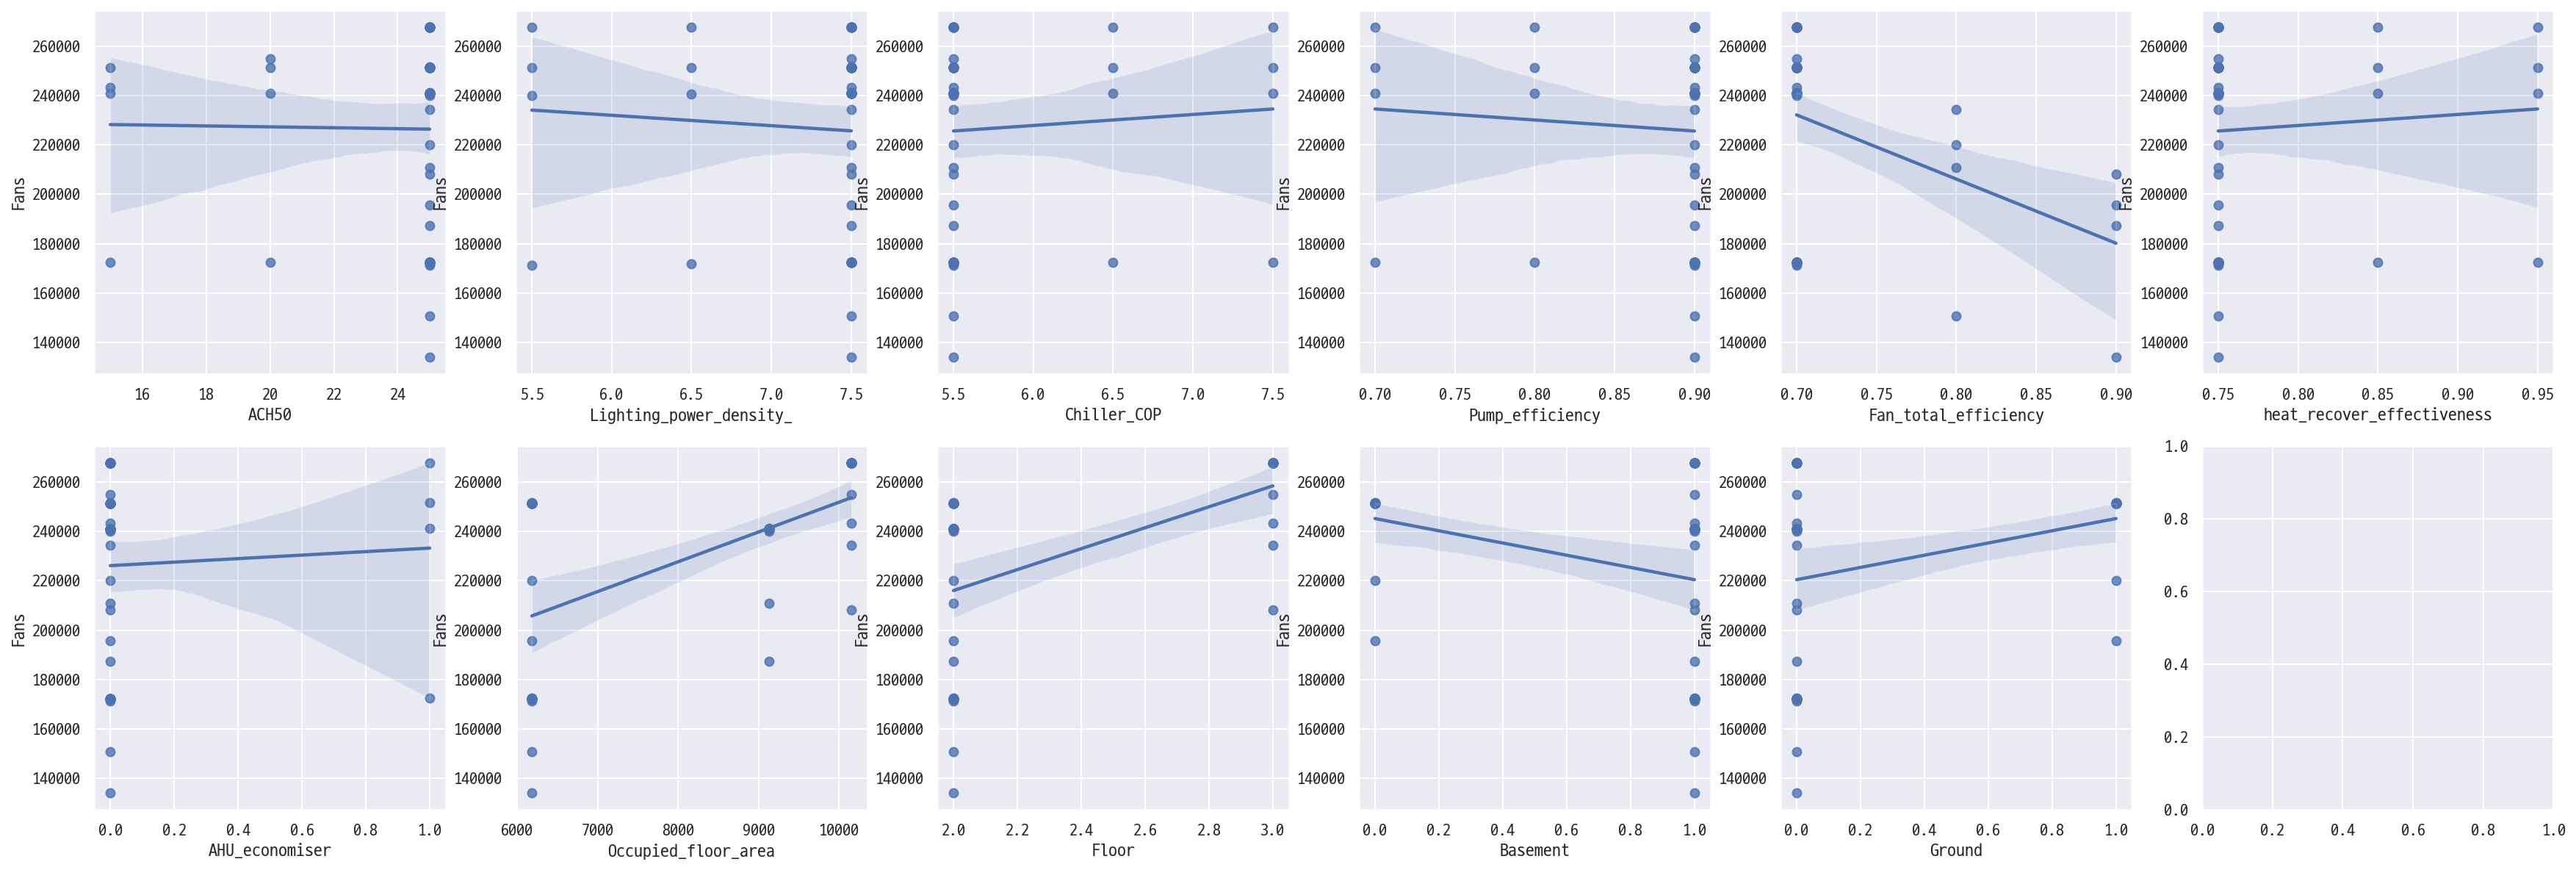

In [7]:
fig, axs = plt.subplots(figsize=(30, 10), ncols=6, nrows=2)
for i, feature in enumerate(lm_features):
    row = int(i/6) #
    col = i%6 
    #seaborn 의 regplot 을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # sns.regplot(x=feature, y='Room_Electricity', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Lighting', data=df_raw, ax=axs[row][col])
    sns.regplot(x=feature, y='Fans', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Pumps', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Heating', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Cooling', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='DHW', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Electricity_total', data=df_raw, ax=axs[row][col])

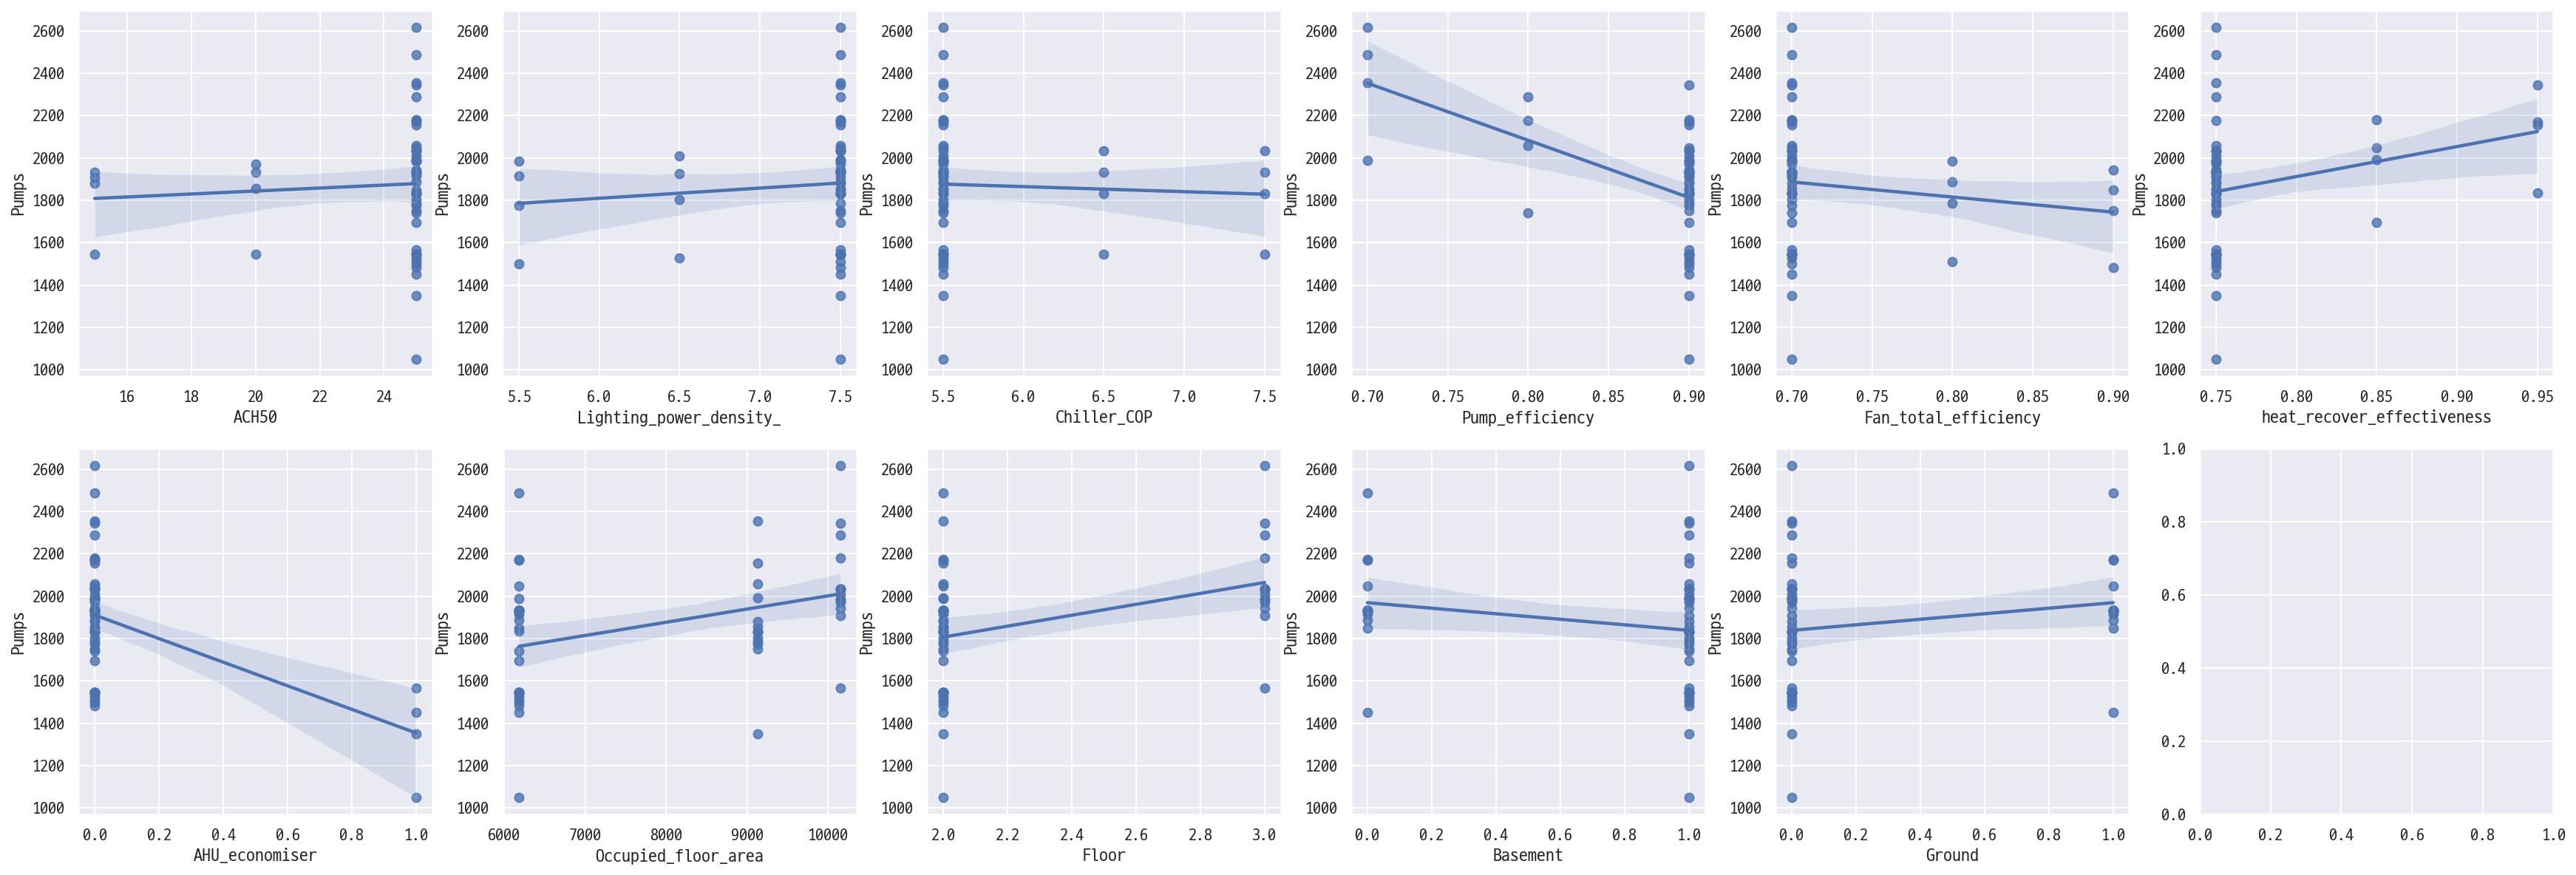

In [8]:
fig, axs = plt.subplots(figsize=(30, 10), ncols=6, nrows=2)
for i, feature in enumerate(lm_features):
    row = int(i/6) #
    col = i%6 
    #seaborn 의 regplot 을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # sns.regplot(x=feature, y='Room_Electricity', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Lighting', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Fans', data=df_raw, ax=axs[row][col])
    sns.regplot(x=feature, y='Pumps', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Heating', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Cooling', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='DHW', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Electricity_total', data=df_raw, ax=axs[row][col])

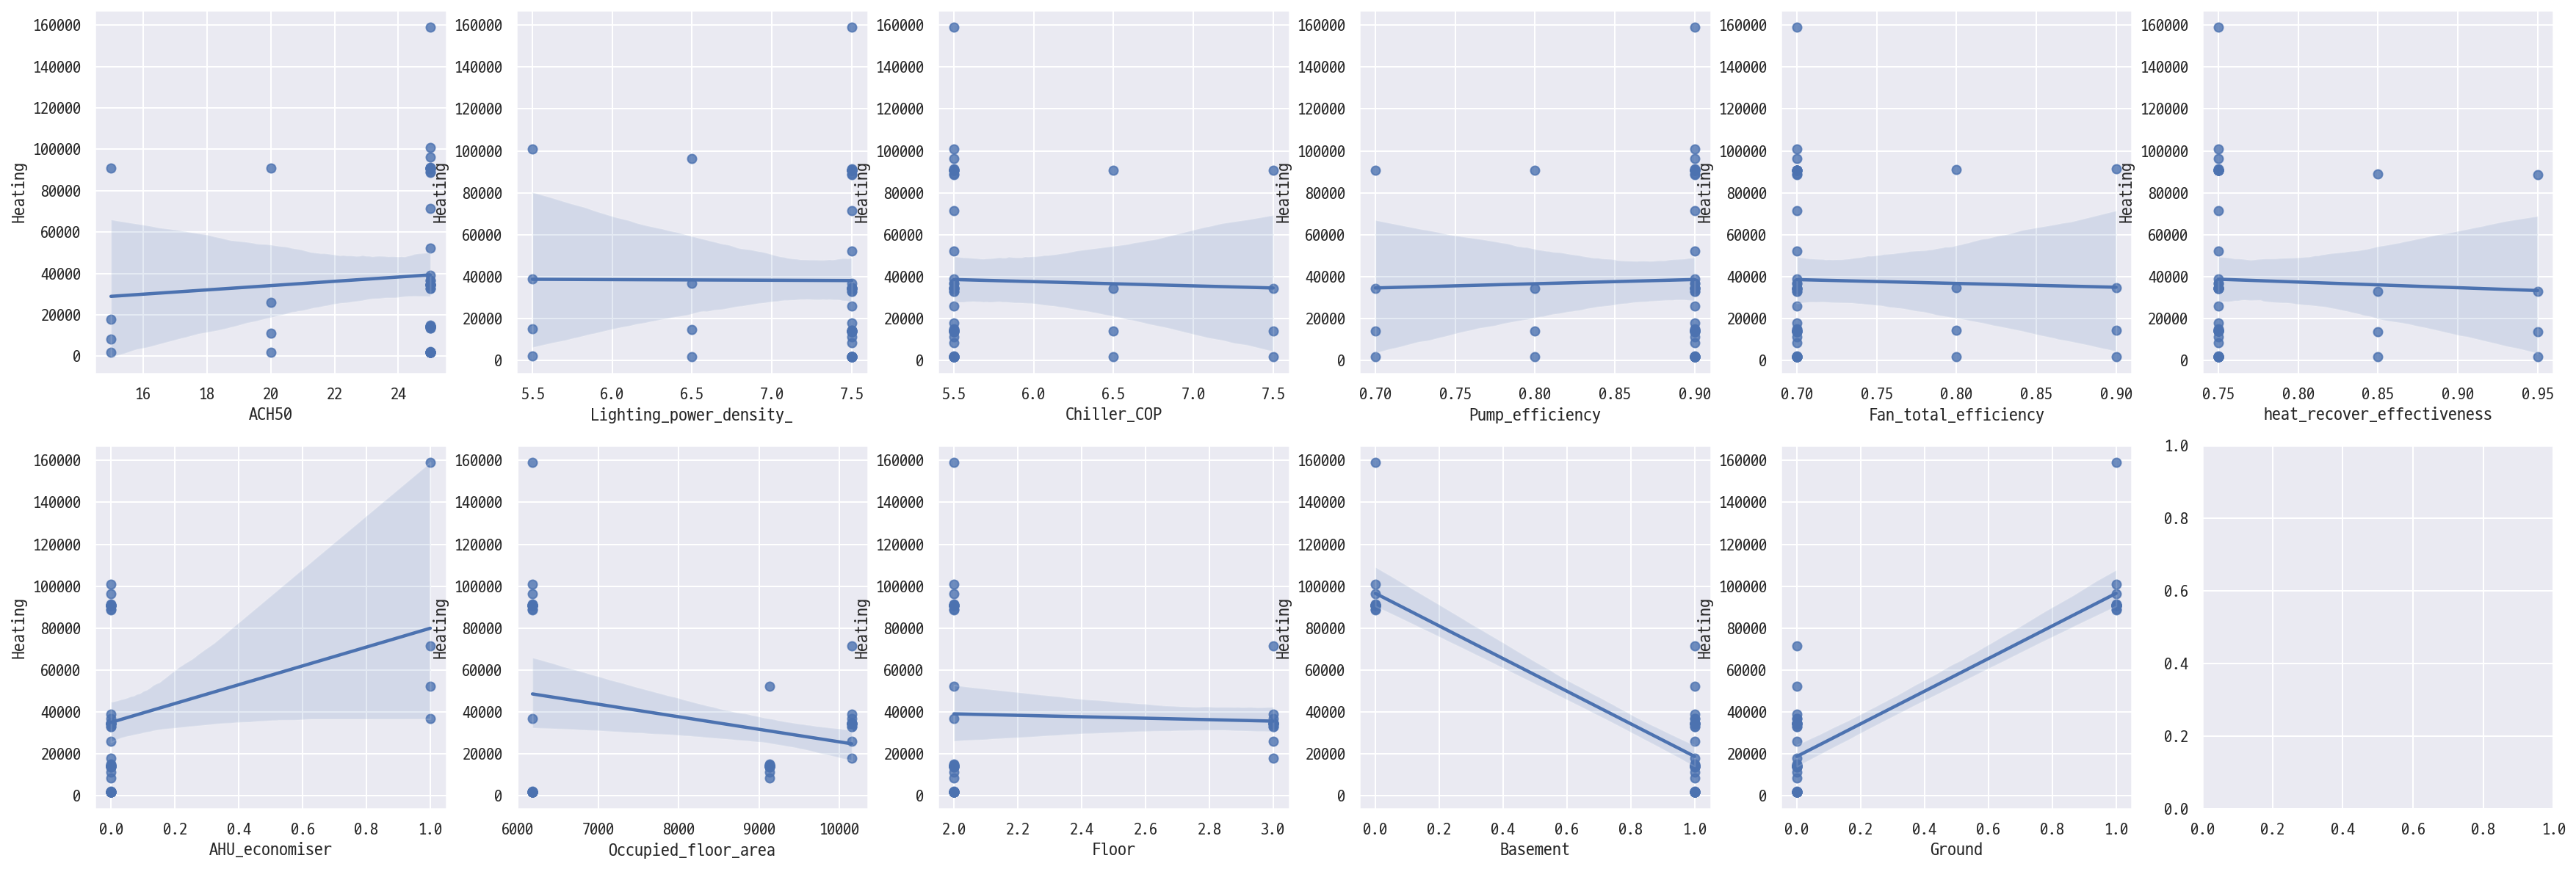

In [9]:
fig, axs = plt.subplots(figsize=(30, 10), ncols=6, nrows=2)
for i, feature in enumerate(lm_features):
    row = int(i/6) #
    col = i%6 
    #seaborn 의 regplot 을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # sns.regplot(x=feature, y='Room_Electricity', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Lighting', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Fans', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Pumps', data=df_raw, ax=axs[row][col])
    sns.regplot(x=feature, y='Heating', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Cooling', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='DHW', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Electricity_total', data=df_raw, ax=axs[row][col])

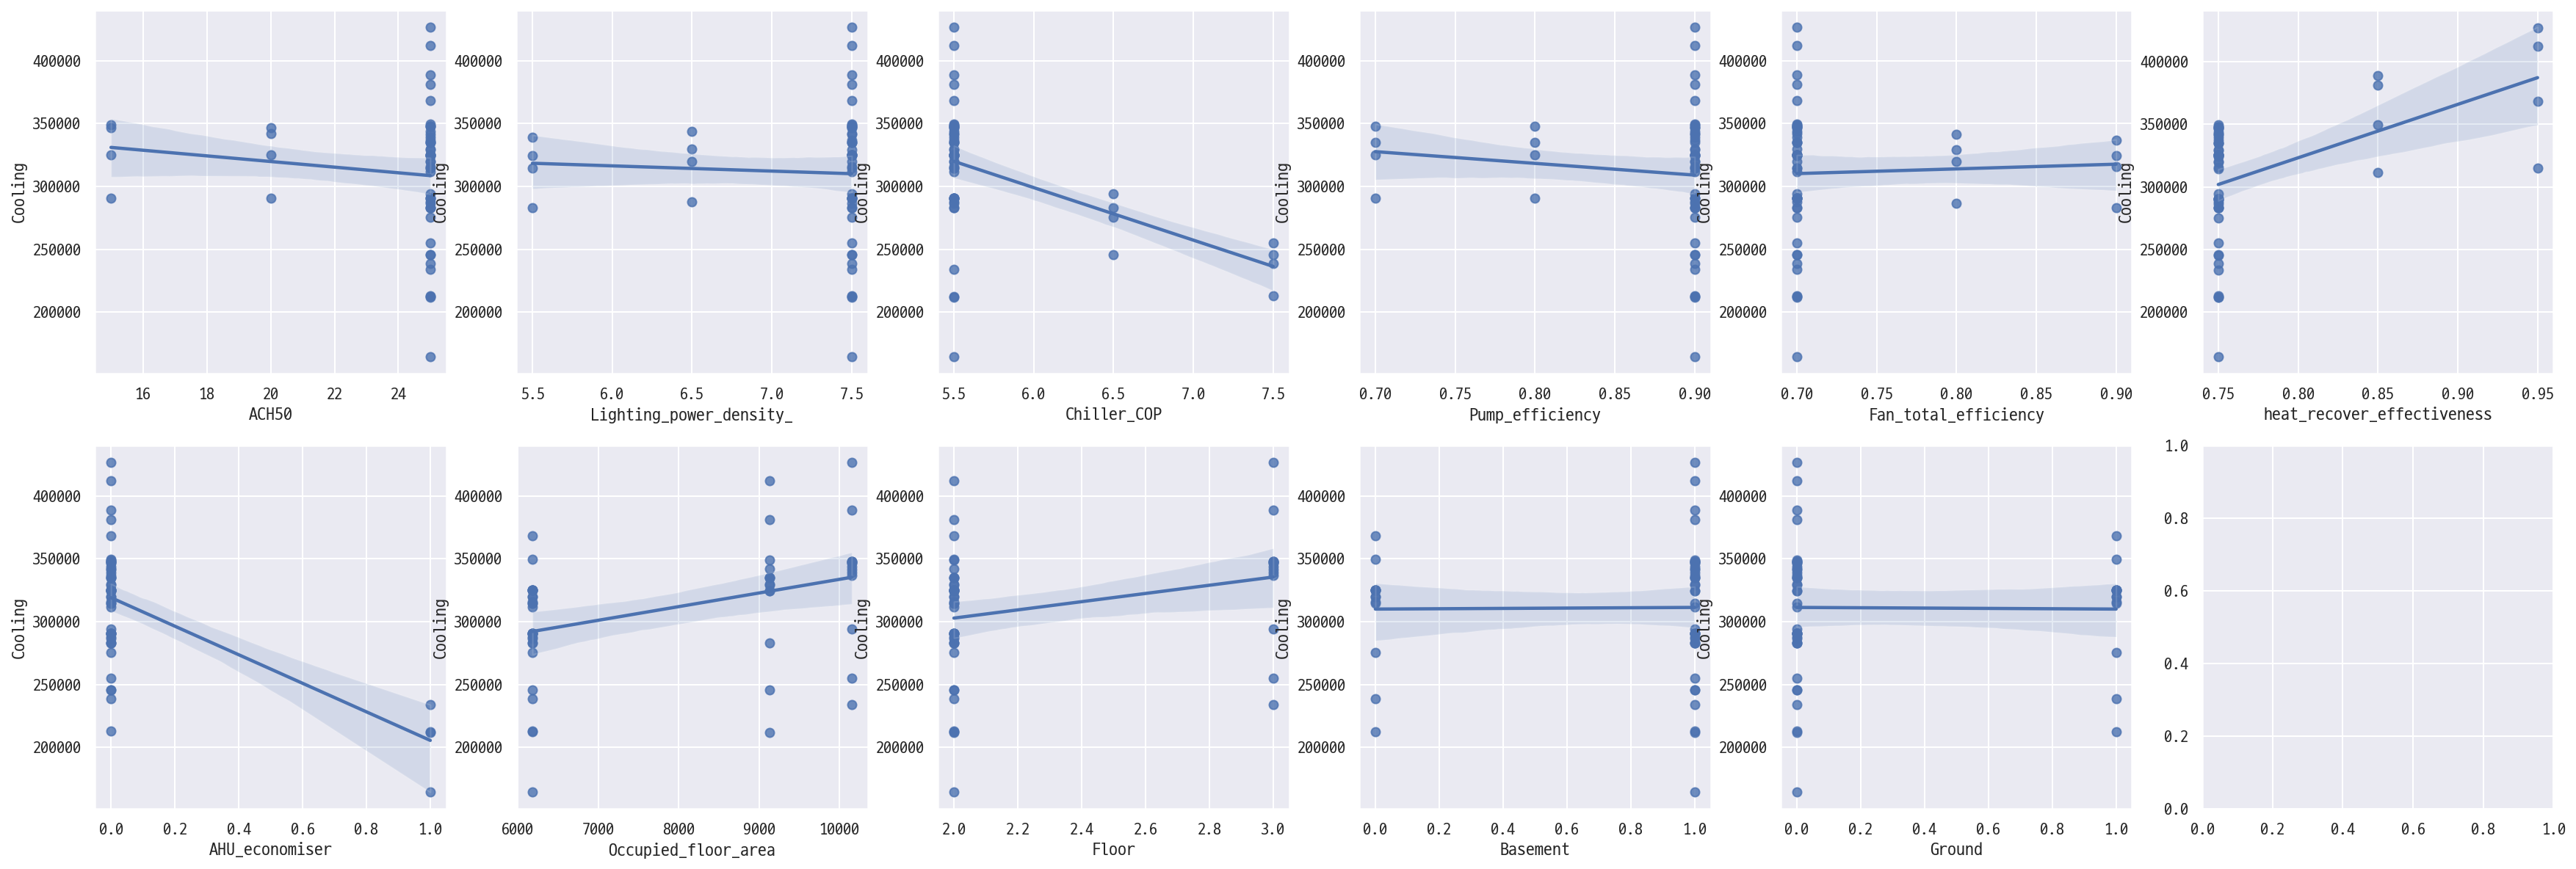

In [10]:
fig, axs = plt.subplots(figsize=(30, 10), ncols=6, nrows=2)
for i, feature in enumerate(lm_features):
    row = int(i/6) #
    col = i%6 
    #seaborn 의 regplot 을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # sns.regplot(x=feature, y='Room_Electricity', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Lighting', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Fans', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Pumps', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Heating', data=df_raw, ax=axs[row][col])
    sns.regplot(x=feature, y='Cooling', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='DHW', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Electricity_total', data=df_raw, ax=axs[row][col])

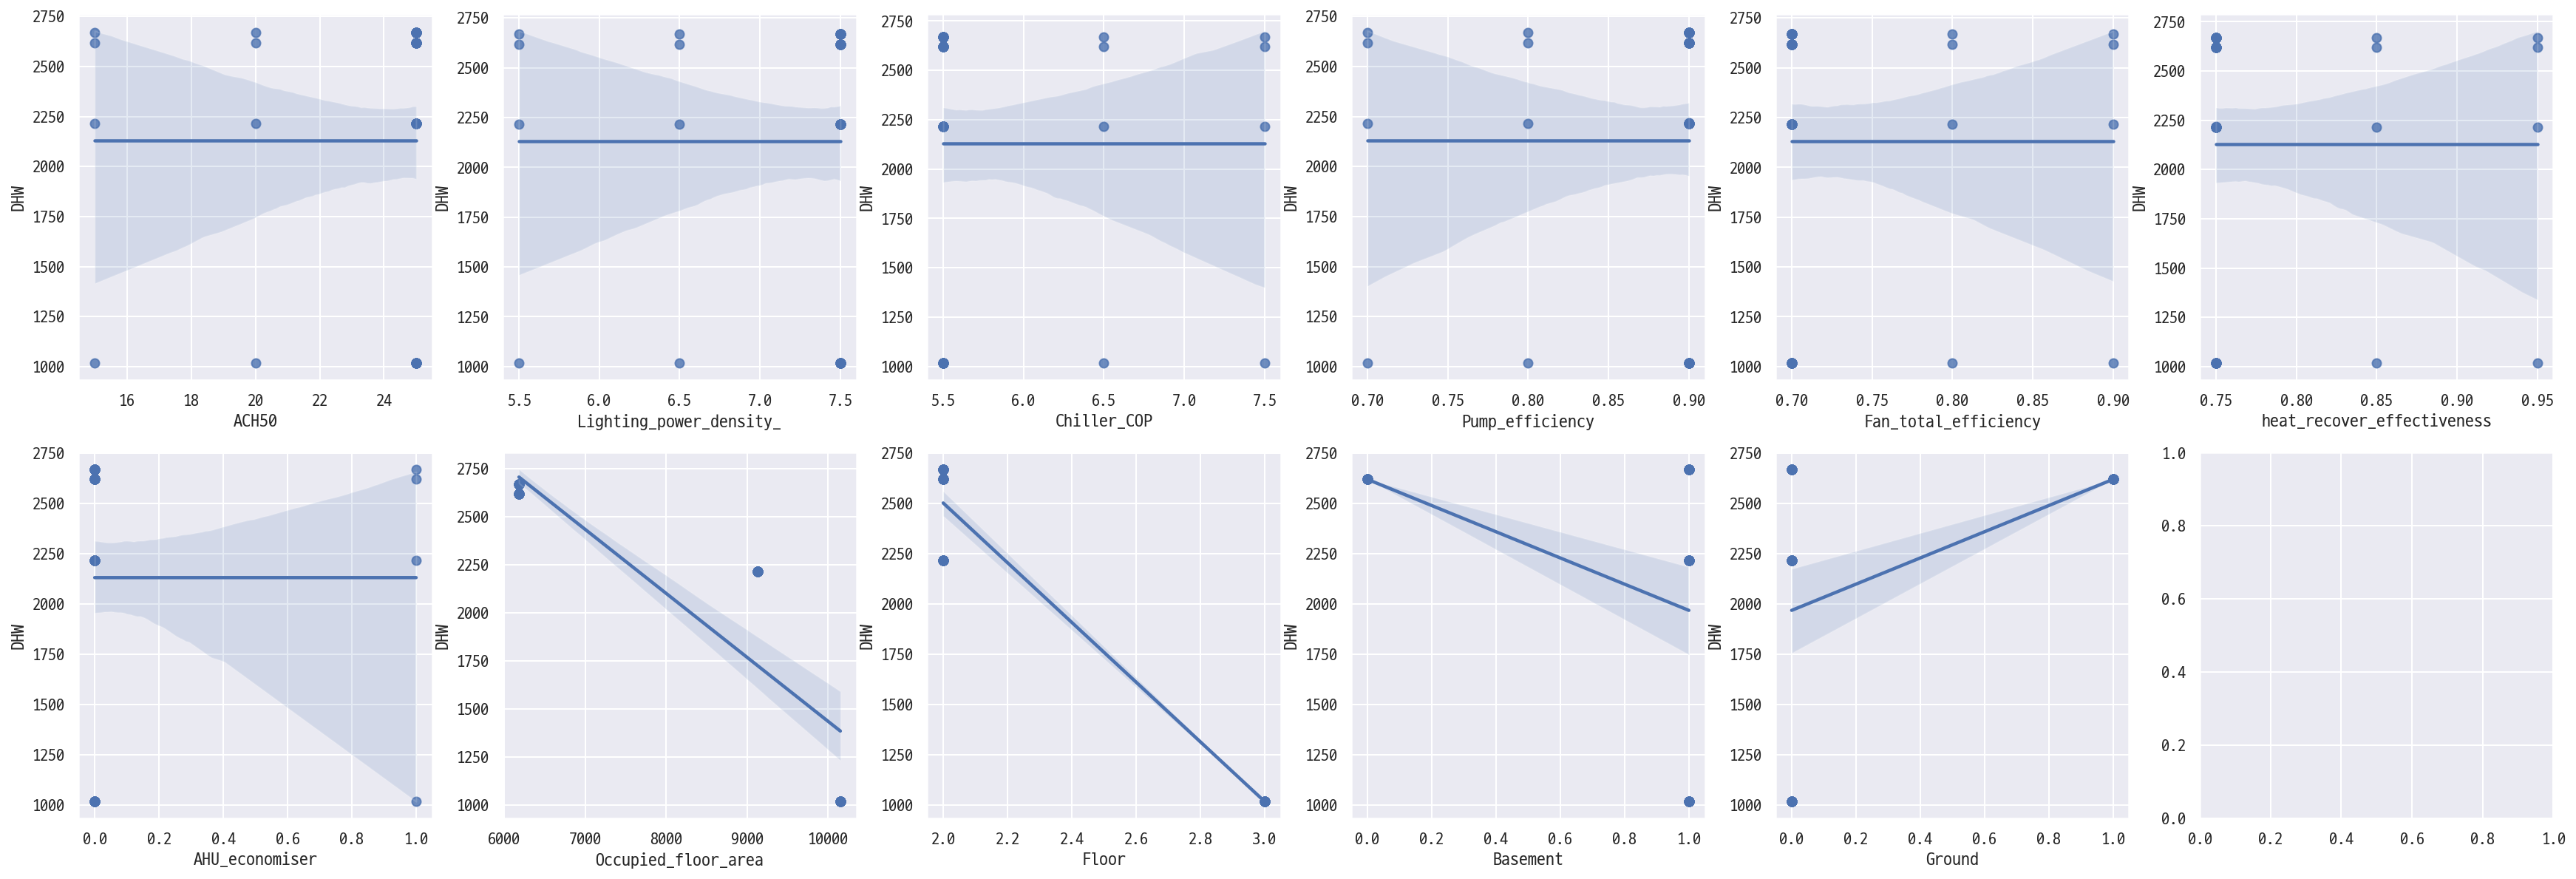

In [11]:
fig, axs = plt.subplots(figsize=(30, 10), ncols=6, nrows=2)
for i, feature in enumerate(lm_features):
    row = int(i/6) #
    col = i%6 
    #seaborn 의 regplot 을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # sns.regplot(x=feature, y='Room_Electricity', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Lighting', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Fans', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Pumps', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Heating', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Cooling', data=df_raw, ax=axs[row][col])
    sns.regplot(x=feature, y='DHW', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Electricity_total', data=df_raw, ax=axs[row][col])

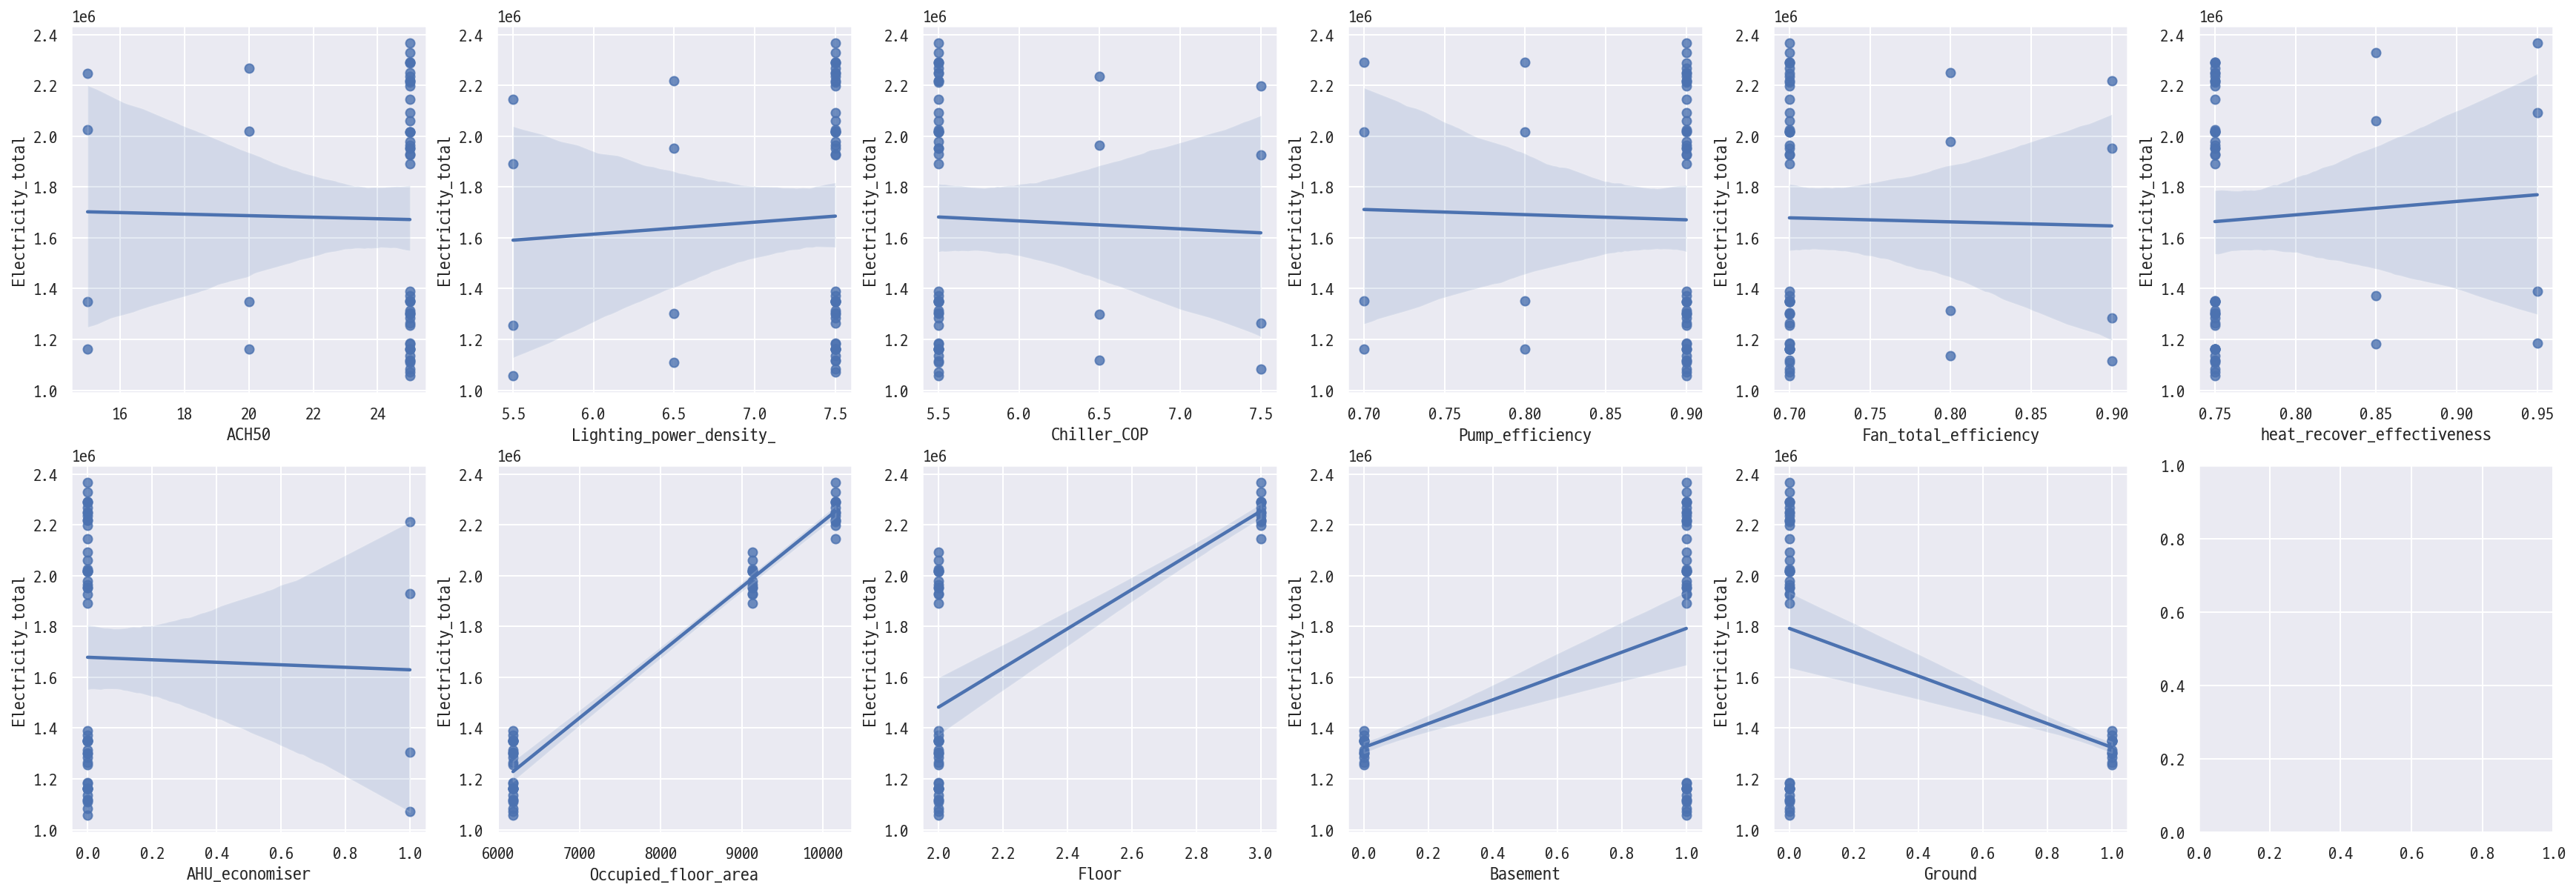

In [12]:
fig, axs = plt.subplots(figsize=(30, 10), ncols=6, nrows=2)
for i, feature in enumerate(lm_features):
    row = int(i/6) #
    col = i%6 
    #seaborn 의 regplot 을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # sns.regplot(x=feature, y='Room_Electricity', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Lighting', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Fans', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Pumps', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Heating', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='Cooling', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='DHW', data=df_raw, ax=axs[row][col])
    sns.regplot(x=feature, y='Electricity_total', data=df_raw, ax=axs[row][col])

In [28]:
# ['ACH50', 'Lighting_power_density_', 'Chiller_COP', 'Pump_efficiency',
#        'Fan_total_efficiency', 'heat_recover_effectiveness', 'AHU_economiser',
#        'Occupied_floor_area', 'Floor', 'Basement', 'Ground',
#        'Room_Electricity', 'Lighting', 'Fans', 'Pumps', 'Heating', 'Cooling',
#        'DHW', 'Electricity_total']


X_data = df_raw.drop(df_raw[['Room_Electricity', 'Lighting', 'Fans', 'Pumps', 'Heating', 'Cooling','DHW', 'Electricity_total']], axis=1, inplace=False)
Y_data = df_raw.drop(df_raw[['ACH50', 'Lighting_power_density_', 'Chiller_COP', 'Pump_efficiency','Fan_total_efficiency', 'heat_recover_effectiveness', 
'AHU_economiser','Occupied_floor_area', 'Floor', 'Basement', 'Ground',]], axis=1, inplace=False)

X_train = X_data.copy()
y_train = Y_data.copy()

lr = LinearRegression()
lr.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data , test_size=0.3, random_state=150)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))
print('절편값:',lr.intercept_)
print('회귀계수값:',np.round(lr.coef_, 1))
# print('회귀계수값:',lr.coef_)

MSE : 30778681.491, RMSE : 5547.854
Variance score : 0.990
절편값: [-844579.14945829 -331878.4946418   240727.67378799    2240.88317316
   -3215.72107278  249399.29814313    5675.8003583  -681629.7097103 ]
회귀계수값: [[ 0.000000e+00  0.000000e+00 -0.000000e+00 -0.000000e+00  0.000000e+00
  -0.000000e+00 -0.000000e+00  2.249000e+02 -1.107108e+05  3.286400e+03
  -3.286500e+03]
 [-0.000000e+00  5.598360e+04  0.000000e+00 -0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  2.110000e+01  7.220900e+04  4.189600e+03
  -4.189600e+03]
 [ 5.424000e+02 -1.451000e+02  3.662000e+02 -3.662300e+03 -2.616984e+05
   3.646000e+03  7.299000e+02  2.270000e+01  3.853000e+02 -3.862130e+04
   3.862130e+04]
 [ 1.100000e+00  1.660000e+01  4.500000e+00 -2.603300e+03 -3.681000e+02
   1.488300e+03 -4.752000e+02  1.000000e-01  8.590000e+01 -1.968000e+02
   1.968000e+02]
 [ 5.451000e+02 -2.068100e+03  4.250000e+01 -4.910000e+02  2.111700e+03
  -5.541800e+03  4.471250e+04  4.100000e+00  1.512320e+04 -4.613820e+04
  

In [30]:
# coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
# coeff

In [54]:
# 입력값들 임시설정

ACH50 = 25
Lighting_power_density = 6
Chiller_COP = 4
Pump_efficiency = 0.7
Fan_total_efficiency = 0.9
heat_recover_effectiveness = 0.75
AHU_economiser = 1
Occupied_floor_area = 6000
Floor = 2
Basement = 1
Ground = 0

# 2차원으로
input = np.array([[
    ACH50,
    Lighting_power_density,
    Chiller_COP,
    Pump_efficiency,
    Fan_total_efficiency,
    heat_recover_effectiveness,
    AHU_economiser,
    Occupied_floor_area,
    Floor,Basement,
    Ground
    ]])


In [55]:
result = lr.predict(input)
result

c:\Users\archi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[286575.49490791, 279493.80652288, 118487.11185409,
          1455.81897479,  48836.19683924, 217058.24274068,
          2696.23281991, 954602.90465951]])

In [56]:

df_result = pd.DataFrame(result, columns=['Room_Electricity', 'Lighting', 'Fans', 'Pumps', 'Heating', 'Cooling','DHW', 'Electricity_total'])
df_result

,Room_Electricity,Lighting,Fans,Pumps,Heating,Cooling,DHW,Electricity_total
0,286575.494908,279493.806523,118487.111854,1455.818975,48836.196839,217058.242741,2696.23282,954602.90466


In [57]:
df_result.iplot(kind='bar')